# Downloading the MNIST dataset

In [22]:
import numpy as np

In [1]:

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [6]:
len(mnist['data'])

70000

# Visualisation

In [7]:
X, y = mnist['data'] , mnist['target']

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
import seaborn as sns

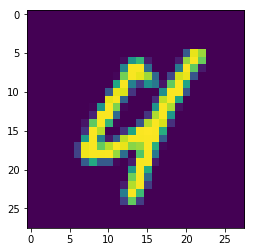

In [18]:
_ = X[30036]
_image = _.reshape(28,28)
plt.imshow(_image)

In [19]:
type(y)

numpy.ndarray

In [20]:
y == 5

array([False, False, False, ..., False, False, False])

In [23]:
np.where(y == 5)

(array([30596, 30597, 30598, ..., 66028, 66029, 66030]),)

In [24]:
_ = X[30596]
_image = _.reshape(28,28)

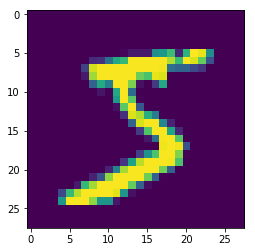

In [25]:
plt.imshow(_image)

# Splitting the train and test sets

In [26]:
num_split = 60000
X_train,X_test,y_train,y_test = X[:num_split],X[num_split:],y[:num_split],y[num_split:]

# Shuffling the Dataset

In [27]:
import numpy as np

In [28]:
shuffle_index = np.random.permutation(num_split)

In [29]:
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

# Training a binary classifier

In [30]:
y_train_0 = (y_train == 0)

In [31]:
y_train_0

array([False, False, False, ..., False, False, False])

In [32]:
y_test_0 = (y_test == 0)

In [33]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

# SGDClassifier

In [35]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=0)
clf.fit(X_train,y_train_0)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Prediction

In [38]:
clf.predict(X[1000].reshape(1,-1))

array([ True])

In [39]:
y[1000]

0.0

# Performance Measures

# Measuring accuracy using Cross-Validation

## StratifiedKFold

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf =SGDClassifier(random_state=0)

In [49]:
skfolds = StratifiedKFold(n_splits=3,random_state=100)

In [50]:
for train_index,test_index in skfolds.split(X_train,y_train_0):
    clone_clf = clone(clf)
    x_train_fold = X_train[train_index]
    y_train_fold = y_train_0[train_index]
    x_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct/len(y_pred)))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9881


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9881


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9810


### cross_val_score using K-fold Cross-validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cross_val_score(clf,X_train,y_train_0,cv=3,scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([0.98810059, 0.9881    , 0.98099905])